### Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import, Path

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
main_path_trainval = './drive/MyDrive/Neuralne mreze/Ultimativni_folder/Train_set'
main_path_test = './drive/MyDrive/Neuralne mreze/Ultimativni_folder/Test_set'
img_size = (64, 64)
batch_size = 64

In [3]:
#some images
p1 = "./drive/MyDrive/Neuralne mreze/Ultimativni_folder/Train_set/Y/Y118.jpg"
p2 = "./drive/MyDrive/Neuralne mreze/Ultimativni_folder/Train_set/Y/Y413.jpg"
p3 = "./drive/MyDrive/Neuralne mreze/Ultimativni_folder/Train_set/Z/Z14.jpg"
p4 = "./drive/MyDrive/Neuralne mreze/Ultimativni_folder/Train_set/Z/Z410.jpg"
p5 = "./drive/MyDrive/Neuralne mreze/Ultimativni_folder/Train_set/V/V484.jpg"
p6 = "./drive/MyDrive/Neuralne mreze/Ultimativni_folder/Train_set/V/V153.jpg"
p7 = "./drive/MyDrive/Neuralne mreze/Ultimativni_folder/Train_set/W/W227.jpg"
p8 = "./drive/MyDrive/Neuralne mreze/Ultimativni_folder/Train_set/W/W460.jpg"
p9 = "./drive/MyDrive/Neuralne mreze/Ultimativni_folder/Train_set/X/X10.jpg"
p10 = "./drive/MyDrive/Neuralne mreze/Ultimativni_folder/Train_set/X/X465.jpg"


In [4]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
from sklearn.externals._packaging.version import SubLocalType
from sklearn.metrics import accuracy_score,precision_score, confusion_matrix,roc_curve,roc_auc_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
import tensorflow as tf
import skimage.filters as sk
from tensorflow import keras
from keras import utils, callbacks
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers, models
from keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from keras.losses import CategoricalCrossentropy
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn import metrics
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img, img_to_array, array_to_img
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from glob import glob
import sklearn

In [5]:
train_folder = './drive/MyDrive/Neuralne mreze/Ultimativni_folder/Train_set'
test_folder = './drive/MyDrive/Neuralne mreze/Ultimativni_folder/Test_set'

# Analysis

**Data Analyzer**

In [6]:
def analyze(data):
    print(f"Type of this data is: {type(data)}");
    if (type(data) == type([1,2,3])):
        print(f"Lenght of this list is: {len(data)}")
    if (type(data) == type(np.array([1,2,3]))):
        print(f"Shape of this array is: {data.shape}")
        if (len(data.shape) == 4):
            print(f"Max value of 4D matrix is: {np.max(data)}")
            print(f"Min value of 4D matrix is: {np.min(data)}")
        if (len(data.shape) == 3):
            print(f"Max value of 3D matrix is: {np.max(data)}")
            print(f"Min value of 3D matrix is: {np.min(data)}")
        if (len(data.shape) == 2):
            print(f"Max value of 2D matrix is: {np.max(data)}")
            print(f"Min value of 2D matrix is: {np.min(data)}")
        if (len(data.shape) == 1):
            print(f"Max value of 1D array is: {np.max(data)}")
            print(f"Min value of 1D array is: {np.min(data)}")

In [ ]:
analyze(cv2.imread(p1))
analyze(cv2.imread(p1, cv2.IMREAD_GRAYSCALE))
analyze(cv2.imread(p1, cv2.IMREAD_COLOR))
analyze(cv2.imread(p1, cv2.IMREAD_UNCHANGED))

Type of this data is: <class 'numpy.ndarray'>
Shape of this array is: (200, 200, 3)
Max value of 3D matrix is: 255
Min value of 3D matrix is: 0
Type of this data is: <class 'numpy.ndarray'>
Shape of this array is: (200, 200)
Max value of 2D matrix is: 255
Min value of 2D matrix is: 13
Type of this data is: <class 'numpy.ndarray'>
Shape of this array is: (200, 200, 3)
Max value of 3D matrix is: 255
Min value of 3D matrix is: 0
Type of this data is: <class 'numpy.ndarray'>
Shape of this array is: (200, 200, 3)
Max value of 3D matrix is: 255
Min value of 3D matrix is: 0


Images have 3 channels - RGB(there is no A channel)

In [ ]:
analyze(cv2.imread(p1, 0)) # for grayscale
analyze(cv2.imread(p1, 1)) # for rgb

Type of this data is: <class 'numpy.ndarray'>
Shape of this array is: (200, 200)
Max value of 2D matrix is: 255
Min value of 2D matrix is: 13
Type of this data is: <class 'numpy.ndarray'>
Shape of this array is: (200, 200, 3)
Max value of 3D matrix is: 255
Min value of 3D matrix is: 0


# Loading

When loading images we can specify do we want 1 or 3 channels, do we want normalization, whether to use filter or not etc

In [7]:
def load_train_test_images(set_folder, channels = 3, normalize = True,\
                     resized=(64,64),add_dimension=True,u8=False,filter=None):
    images = []; labels = []; index = -1; k =0; x = 0;
    folders = sorted(os.listdir(set_folder));
    for folder in folders:
        index+=1

        print("Loading images from folder ", folder, " has started.");
        for image in os.listdir(set_folder + '/' + folder):
            img = cv2.imread(set_folder + '/' + folder + '/' + image, 0 if channels == 1 else 1);
            if (k == 0): print('Original Dimensions: ', img.shape);

            if filter!=None:
                img = filter(img)

            img = cv2.resize(img, resized);
            if (k == 0): print('New dimensions: ', img.shape); k+= 1;

            if add_dimension:
                img = img_to_array(img)
            images.append(img)
            labels.append(index)

        print(f"Folder {folder} has {len(images) - x} images")
        x = len(images);
    analyze(images)
    images = np.array(images)
    #analyze(images)
    if normalize:
       images = images.astype('float32')/255.0
    elif not u8:
       images = images.astype('float32')
    analyze(images)
    labels = to_categorical(labels)

    return images, labels

**Load Single image**

In [8]:
def show_image(image, title = "title", fig_size=3):
    plt.figure(figsize=(fig_size,fig_size))
    plt.imshow(image)
    plt.axis('off')
    plt.title(title)

In [9]:
def load_single_image(single_path = "./drive/MyDrive/Neuralne mreze/Ultimativni_folder/Train_set/X/X106.jpg",
                      channels = 1, normalize = True, resized = (64, 64), add_dimension = True, u8 = False):
    map_characters = { 1: 'V', 2: 'W', 3: 'X', 4: 'Y', 5: 'Z'}
    image_0 = cv2.imread(single_path, channels);
    image_0 = cv2.resize(image_0, resized);
    #analyze(image_0) #This is uint8
    if add_dimension:
        image_0 = np.array(image_0)
        #analyze(image_0)
        image_0 = img_to_array(image_0)
        #analyze(image_0)
    else:
        image_0 = np.array(image_0)
    #analyze(image_0)

    if normalize:
        image_0 = image_0.astype('float32')/255.0
    elif not u8:
        image_0 = image_0.astype('float32')

    analyze(image_0)
    for k in map_characters:
        if map_characters[k] == single_path[60]: label_0 = k;

    print(f"Picture has dimensions: {image_0.shape}, and it belongs to class: {map_characters[label_0]}")
    #analyze(image_0)
    return image_0, label_0

Type of this data is: <class 'numpy.ndarray'>
Shape of this array is: (64, 64, 3)
Max value of 3D matrix is: 1.0
Min value of 3D matrix is: 0.003921568859368563
Picture has dimensions: (64, 64, 3), and it belongs to class: Y
Type of this data is: <class 'numpy.ndarray'>
Shape of this array is: (64, 64, 1)
Max value of 3D matrix is: 0.9843137264251709
Min value of 3D matrix is: 0.05882352963089943
Picture has dimensions: (64, 64, 1), and it belongs to class: Y


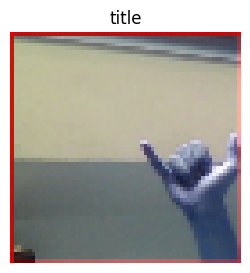

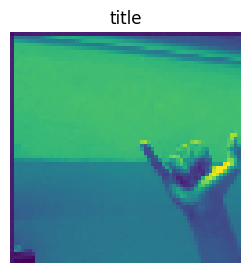

In [ ]:
image1, label1 = load_single_image(p1)
show_image(image1)
type(image1)

image1, label1 = load_single_image(p1, channels = 0)
show_image(image1)

In [10]:
def subplot_images(*images):
    plt.figure(figsize=(20,20))
    j = 1;
    k = list(range(len(*images)))
    #print(k)
    t = np.array(images).astype('float32')
    d = len(t.shape)
    #analyze(t)
    if d == 5:
        for i in k:
            #analyze(t[0, i, :,:,:])
            plt.subplot(7,4,j)
            plt.imshow(t[0, i, :,:,:])
            plt.axis('off')
            j=j+1
    elif d == 4:
        for i in k:
            #analyze(t[0, i, :,:])
            plt.subplot(7,4,j)
            plt.imshow(t[0, i,:,:])
            plt.axis('off')
            j=j+1


Type of this data is: <class 'numpy.ndarray'>
Shape of this array is: (64, 64, 3)
Max value of 3D matrix is: 0.9882352948188782
Min value of 3D matrix is: 0.003921568859368563
Picture has dimensions: (64, 64, 3), and it belongs to class: X


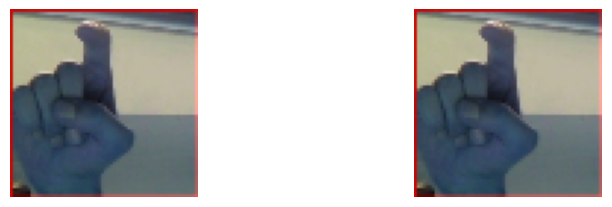

In [187]:
image_0, lab_0 = load_single_image()
subplot_images([image_0, image_0])

# Digital image preprocessing

In this segment I will try different combinations of filters, mainly for edge detections, in order to help get better performance

## Channeling, transformations

In [ ]:
from copy import deepcopy
def rgb(t):
    red_channel = deepcopy(t);
    green_channel = deepcopy(t);
    blue_channel = deepcopy(t);
    red_channel[:,:, 1] = 0; red_channel[:,:,2] = 0
    green_channel[:,:, 0] = 0; green_channel[:,:,2] = 0;
    blue_channel[:,:, 0] = 0; blue_channel[:,:,1] = 0;
    #analyze(blue_channel)
    return red_channel, green_channel, blue_channel

Type of this data is: <class 'numpy.ndarray'>
Shape of this array is: (64, 64, 3)
Max value of 3D matrix is: 0.9882352948188782
Min value of 3D matrix is: 0.003921568859368563
Picture has dimensions: (64, 64, 3), and it belongs to class: X


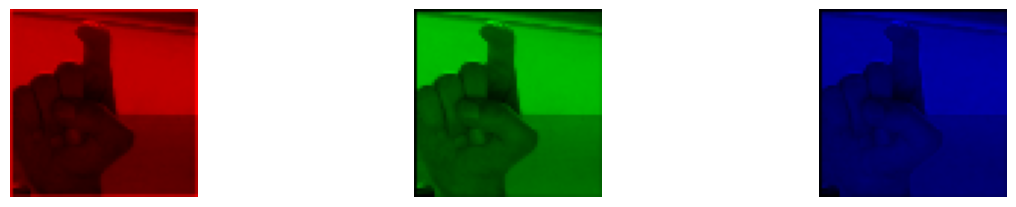

In [ ]:
image_0, lab_0 = load_single_image()
subplot_images(rgb(image_0))

In [ ]:
def rgb2grayscale(rgb, i = 1): #This happens when we load RGB image as grayscale image
    if i == 1: return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])
    elif i == 2: return np.dot(rgb[...,:3], [0.333, 0.333, 0.333])
    else: return np.dot(rgb[...,:3], [0, 0, 0.2])

Type of this data is: <class 'numpy.ndarray'>
Shape of this array is: (64, 64, 3)
Max value of 3D matrix is: 0.9882352948188782
Min value of 3D matrix is: 0.003921568859368563
Picture has dimensions: (64, 64, 3), and it belongs to class: X
Type of this data is: <class 'numpy.ndarray'>
Shape of this array is: (64, 64)
Max value of 2D matrix is: 0.882138046234846
Min value of 2D matrix is: 0.0668290230743587


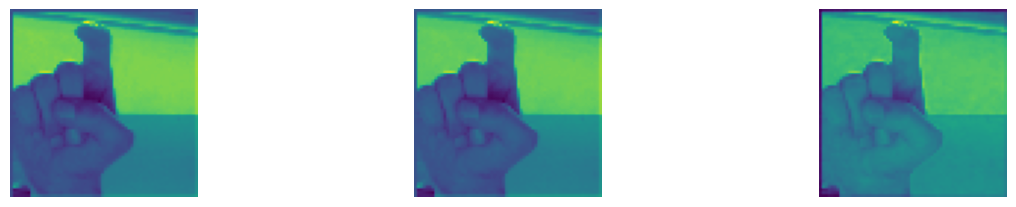

In [ ]:
image_1, label_1 = load_single_image()
img_2D_1 = rgb2grayscale(image_1, 1)
img_2D_2 = rgb2grayscale(image_1, 2)
img_2D_3 = rgb2grayscale(image_1, 3)
analyze(img_2D_1)
subplot_images((img_2D_1, img_2D_2, img_2D_3))

In [ ]:
def rgb_to_gray_rgb(img):
        grayImage = np.zeros(img.shape)
        R = np.array(img[:, :, 0])
        G = np.array(img[:, :, 1])
        B = np.array(img[:, :, 2])

        R = (R *.299) #its cooler with parentheses
        G = (G *.587)
        B = (B *.114)

        Avg = (R+G+B)
        grayImage = img.copy()

        for i in range(3):
           grayImage[:,:,i] = Avg

        return grayImage

Type of this data is: <class 'numpy.ndarray'>
Shape of this array is: (64, 64, 3)
Max value of 3D matrix is: 0.9882352948188782
Min value of 3D matrix is: 0.003921568859368563
Picture has dimensions: (64, 64, 3), and it belongs to class: Y
Type of this data is: <class 'numpy.ndarray'>
Shape of this array is: (64, 64, 3)
Max value of 3D matrix is: 0.7726039290428162
Min value of 3D matrix is: 0.09085490554571152


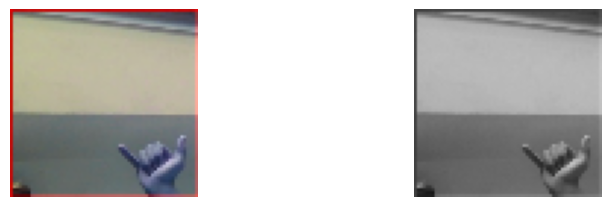

In [ ]:
image_1, label_1 = load_single_image(p2, 1)
gray = rgb_to_gray_rgb(image_1)
analyze(gray)
subplot_images((image_1, gray))

## Filtering images

### Manual filters

In [98]:
#no kernel
kernel0 = np.array([[0, 0, 0], [0, 1, 0], [0, 0, 0]], np.float32);

#blur
kernel1 = np.ones((3,3), np.float32)*0.111;

#strait edges
kernel2 = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]], np.float32);
kernel3 = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]], np.float32);
kernel4 = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0,1]], np.float32);
kernel5 = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]], np.float32);

#+-45 degrees
kernel6 = np.array([[0, -1, -1], [1, 0, -1], [1, 1, 0]], np.float32);
kernel7 = np.array([[-1, -1, 0], [-1, 0, 1], [0, 1,1]], np.float32);
kernel8 = np.array([[1, 1, 0], [1, 0, -1], [0, -1, -1]], np.float32);
kernel9 = np.array([[0, 1, 1], [-1, 0, 1], [-1, -1,0]], np.float32);

#Edge detection
kernel10 = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1,-1]], np.float32);

#sharpen
kernel11 = np.array([[0, -1, 0], [-1, 5, -1], [0, -1,0]], np.float32);

kernels = [(kernel0, "no filter"), (kernel1, "blur"), (kernel2, "horizontal_-1_0_1"), (kernel3, "horizontal_1_0_-1"), (kernel4, "vertical_-1_0_1"),\
           (kernel5, "vertical_1_0_-1"), (kernel6, "+45_1"), (kernel7, "-45_-1"), (kernel8, "-45_1"),\
           (kernel9, "+45_-1"), (kernel10, "Edge detection"), (kernel11, "sharpen")];

Type of this data is: <class 'numpy.ndarray'>
Shape of this array is: (64, 64, 1)
Max value of 3D matrix is: 0.8784313797950745
Min value of 3D matrix is: 0.054901961237192154
Picture has dimensions: (64, 64, 1), and it belongs to class: X


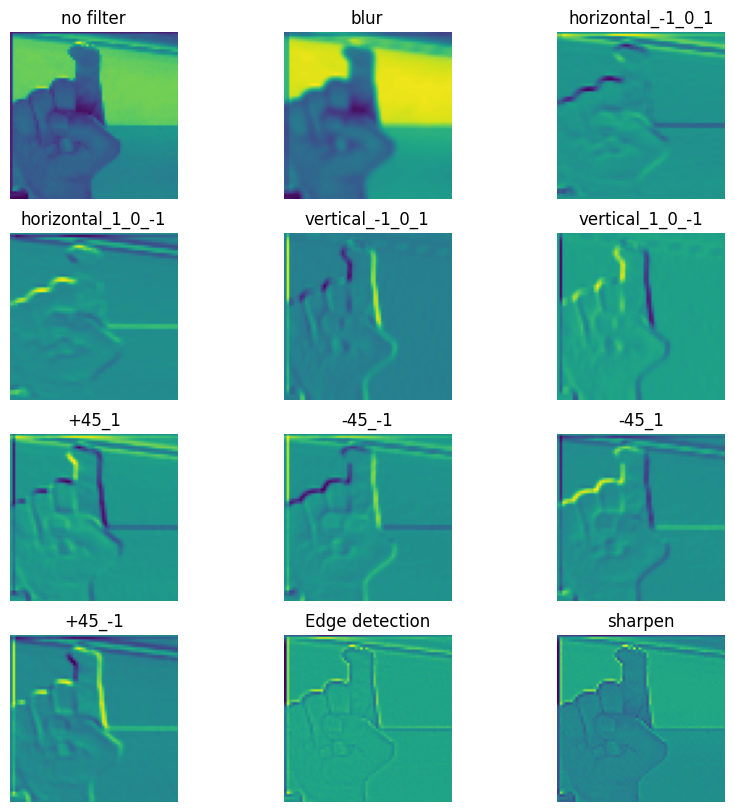

In [ ]:
image_1, label_1 = load_single_image(channels = 0)
plt.figure(figsize=(10,10))
j = 1;

for kernel in kernels:
    plt.subplot(4,3,j)
    t = cv2.filter2D(image_1, -1, kernel[0])
    plt.imshow(t)
    plt.title(kernel[1])
    plt.axis('off')
    j=j+1

Type of this data is: <class 'numpy.ndarray'>
Shape of this array is: (64, 64, 1)
Max value of 3D matrix is: 0.8784313797950745
Min value of 3D matrix is: 0.054901961237192154
Picture has dimensions: (64, 64, 1), and it belongs to class: X
Type of this data is: <class 'numpy.ndarray'>
Shape of this array is: (64, 64)
Max value of 2D matrix is: 0.7278118133544922
Min value of 2D matrix is: -0.57110595703125


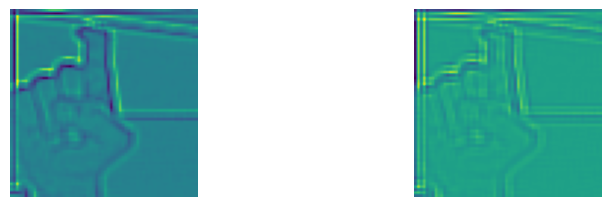

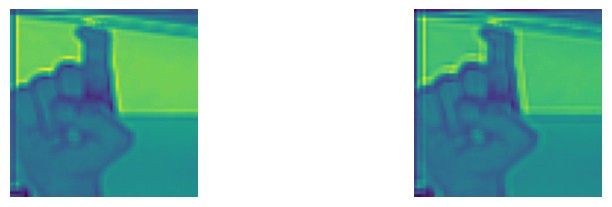

In [ ]:
image_1, label_1 = load_single_image(channels = 0)
f1 = cv2.filter2D(cv2.filter2D(image_1, -1, kernel1), -1, kernel10)
f1_1 = cv2.filter2D(cv2.filter2D(f1, -1, kernel1), -1, kernel10)
f2 = cv2.filter2D(cv2.filter2D(image_1, -1, kernel1), -1, kernel11)
f2_1 = cv2.filter2D(cv2.filter2D(f2, -1, kernel1), -1, kernel11)
analyze(f1)
subplot_images((f1, f1_1))
subplot_images((f2, f2_1))

Type of this data is: <class 'numpy.ndarray'>
Shape of this array is: (64, 64)
Max value of 2D matrix is: 224
Min value of 2D matrix is: 14
Picture has dimensions: (64, 64), and it belongs to class: X


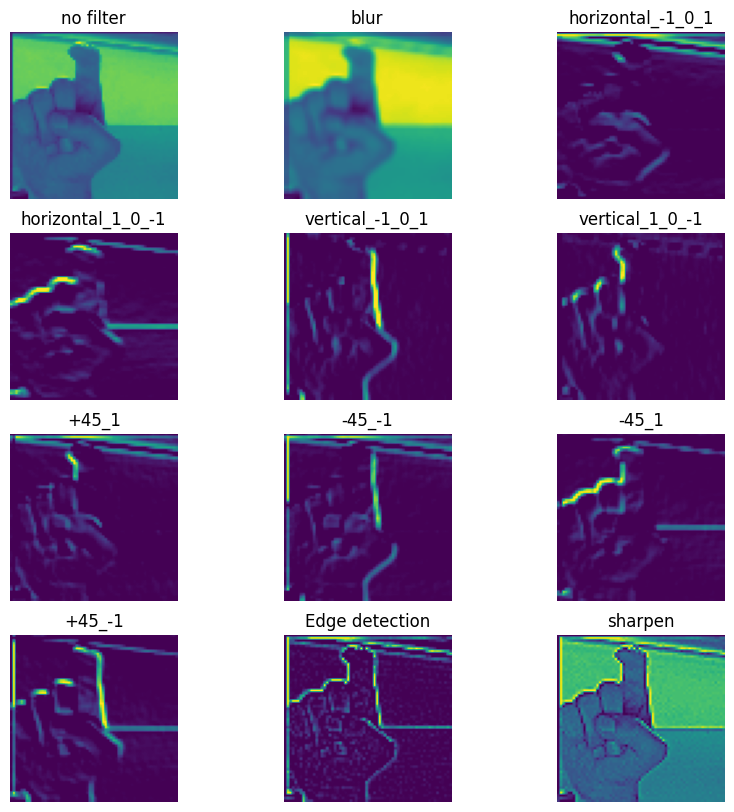

In [ ]:
image_1, label_1 = load_single_image(channels = 0, normalize=False, add_dimension=False, u8 = True)
plt.figure(figsize=(10,10))
j = 1;

for kernel in kernels:
    plt.subplot(4,3,j)
    t = cv2.filter2D(image_1, -1, kernel[0])
    plt.imshow(t)
    plt.title(kernel[1])
    plt.axis('off')
    j=j+1

Type of this data is: <class 'numpy.ndarray'>
Shape of this array is: (64, 64)
Max value of 2D matrix is: 224
Min value of 2D matrix is: 14
Picture has dimensions: (64, 64), and it belongs to class: X


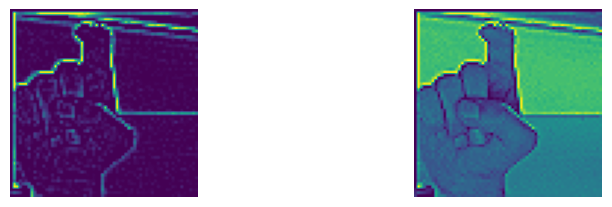

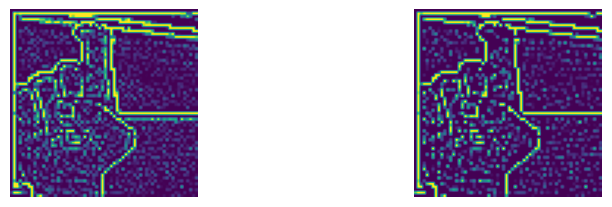

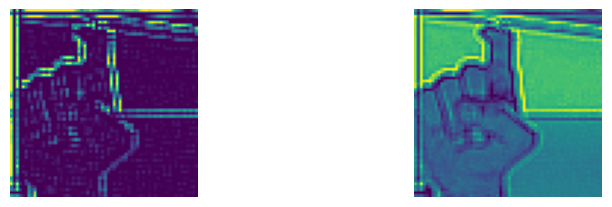

In [ ]:
image_1, label_1 = load_single_image(channels = 0, normalize=False, add_dimension=False, u8 = True)
edge = cv2.filter2D(image_1, -1, kernel10)
sharpen = cv2.filter2D(image_1, -1, kernel11)
f1 = cv2.filter2D(cv2.filter2D(image_1, -1, kernel11), -1, kernel10)
f2 = cv2.filter2D(cv2.filter2D(image_1, -1, kernel10), -1, kernel10)

edge2 = cv2.filter2D(cv2.filter2D(edge, -1, kernel1), -1, kernel10)
sharpen2 = cv2.filter2D(cv2.filter2D(sharpen, -1, kernel1), -1, kernel11)

subplot_images((edge, sharpen))
subplot_images((f1, f2))
subplot_images((edge2, sharpen2))

In [99]:
def manual_edge(img):
    sharpen = cv2.filter2D(img, -1, kernel11)
    edge = cv2.filter2D(sharpen, -1, kernel10)
    return edge

In [100]:
def manual_edge2(img):
    edge = cv2.filter2D(img, -1, kernel10)
    edge2 = cv2.filter2D(cv2.filter2D(edge, -1, kernel1), -1, kernel10)
    return edge2

In [101]:
def manual_edge3(img):
    edge = cv2.filter2D(img, -1, kernel10)
    edge2 = cv2.filter2D(cv2.filter2D(edge, -1, kernel1), -1, kernel10)
    ret, th = cv2.threshold(edge2, 67, 255, cv2.THRESH_BINARY)
    return th

Type of this data is: <class 'numpy.ndarray'>
Shape of this array is: (64, 64)
Max value of 2D matrix is: 224
Min value of 2D matrix is: 14
Picture has dimensions: (64, 64), and it belongs to class: X


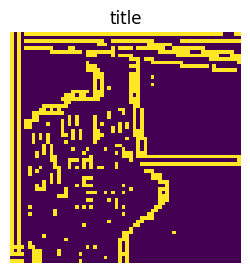

In [102]:
def manual_edge3(img):
    edge = cv2.filter2D(img, -1, kernel10)
    edge2 = cv2.filter2D(cv2.filter2D(edge, -1, kernel1), -1, kernel10)
    ret, th = cv2.threshold(edge2, 23, 255, cv2.THRESH_BINARY)
    return th
image_1, label_1 = load_single_image(channels = 0, normalize=False, add_dimension=False, u8 = True)
show_image(manual_edge3(image_1))

Type of this data is: <class 'numpy.ndarray'>
Shape of this array is: (64, 64)
Max value of 2D matrix is: 224
Min value of 2D matrix is: 14
Picture has dimensions: (64, 64), and it belongs to class: X


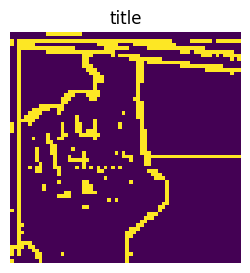

In [103]:
def manual_edge4(img):
    #edge = cv2.filter2D(img, -1, kernel10)
    edge2 = cv2.filter2D(cv2.filter2D(img, -1, kernel1), -1, kernel10)
    ret, th = cv2.threshold(edge2, 13, 255, cv2.THRESH_BINARY)
    return th
image_1, label_1 = load_single_image(channels = 0, normalize=False, add_dimension=False, u8 = True)
show_image(manual_edge4(image_1))

### Filters for edge detection

Canny edge detector

Type of this data is: <class 'numpy.ndarray'>
Shape of this array is: (64, 64)
Max value of 2D matrix is: 224
Min value of 2D matrix is: 14
Picture has dimensions: (64, 64), and it belongs to class: X


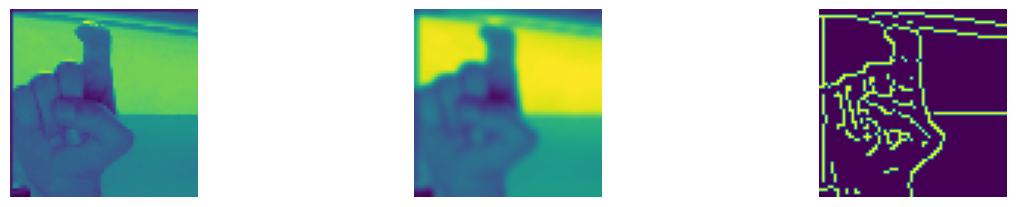

In [138]:
image_1, label_1 = load_single_image(channels = 0, normalize=False, add_dimension=False, u8 = True)
blurred = cv2.GaussianBlur(image_1, (5, 5), 0)
edges = cv2.Canny(blurred, threshold1=33, threshold2=35)
subplot_images((image_1, blurred, edges))

In [104]:
def canny(img):
    blurred = cv2.GaussianBlur(img, (5, 5), 0)
    edges = cv2.Canny(blurred, threshold1=30, threshold2=50)
    return edges

In [105]:
def canny2(img):
    blurred = cv2.GaussianBlur(img, (5, 5), 0)
    edges = cv2.Canny(blurred, threshold1=35, threshold2=40)
    return edges

Type of this data is: <class 'numpy.ndarray'>
Shape of this array is: (64, 64)
Max value of 2D matrix is: 224
Min value of 2D matrix is: 14
Picture has dimensions: (64, 64), and it belongs to class: X
Type of this data is: <class 'numpy.ndarray'>
Shape of this array is: (64, 64)
Max value of 2D matrix is: 199
Min value of 2D matrix is: 15
Picture has dimensions: (64, 64), and it belongs to class: Y
Type of this data is: <class 'numpy.ndarray'>
Shape of this array is: (64, 64)
Max value of 2D matrix is: 182
Min value of 2D matrix is: 14
Picture has dimensions: (64, 64), and it belongs to class: V


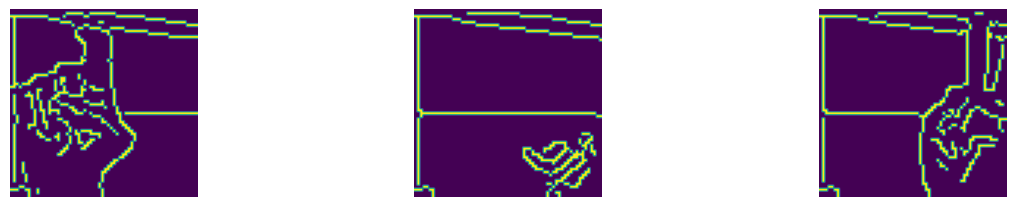

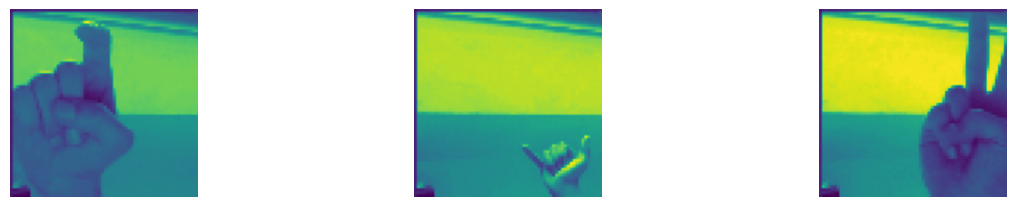

In [153]:
image_1, label_1 = load_single_image(channels = 0, normalize=False, add_dimension=False, u8 = True)
image_2, label_2 = load_single_image(single_path = p2, channels = 0, normalize=False, add_dimension=False, u8 = True)
image_3, label_3 = load_single_image(single_path = p6, channels = 0, normalize=False, add_dimension=False, u8 = True)

subplot_images((canny2(image_1), canny2(image_2), canny2(image_3)))
subplot_images((image_1, image_2, image_3))

Sobel, roberts filter

Type of this data is: <class 'numpy.ndarray'>
Shape of this array is: (64, 64)
Max value of 2D matrix is: 224
Min value of 2D matrix is: 14
Picture has dimensions: (64, 64), and it belongs to class: X


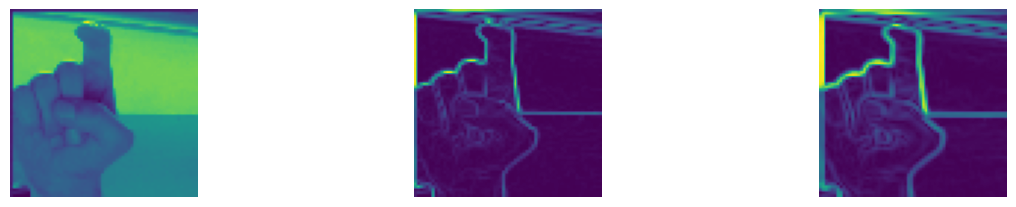

In [ ]:
import skimage.filters as sk
t, label = load_single_image(channels = 0, add_dimension = False, normalize=False, u8 = True)

subplot_images((t, sk.roberts(t), sk.sobel(t)))

In [106]:
def sobel(img):
    sobel = sk.sobel(img)
    return sobel

def sobel2(img):
    #th = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            #cv2.THRESH_BINARY,11,4)
    sobel = sk.sobel(img)
    ret, th = cv2.threshold(sobel, 0.05, 1, cv2.THRESH_BINARY)
    return th

def roberts(img):
    roberts = sk.roberts(img)
    return roberts

Type of this data is: <class 'numpy.ndarray'>
Shape of this array is: (64, 64)
Max value of 2D matrix is: 224
Min value of 2D matrix is: 14
Picture has dimensions: (64, 64), and it belongs to class: X
Type of this data is: <class 'numpy.ndarray'>
Shape of this array is: (64, 64)
Max value of 2D matrix is: 199
Min value of 2D matrix is: 15
Picture has dimensions: (64, 64), and it belongs to class: Y
Type of this data is: <class 'numpy.ndarray'>
Shape of this array is: (64, 64)
Max value of 2D matrix is: 182
Min value of 2D matrix is: 14
Picture has dimensions: (64, 64), and it belongs to class: V


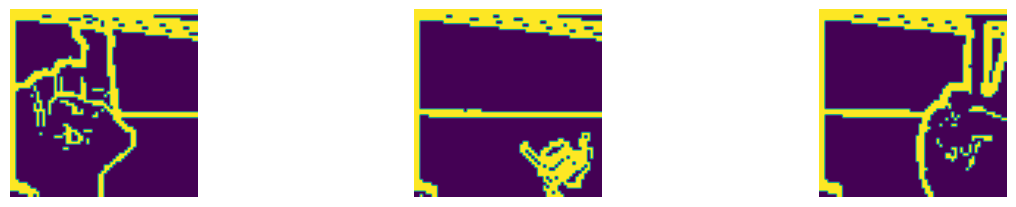

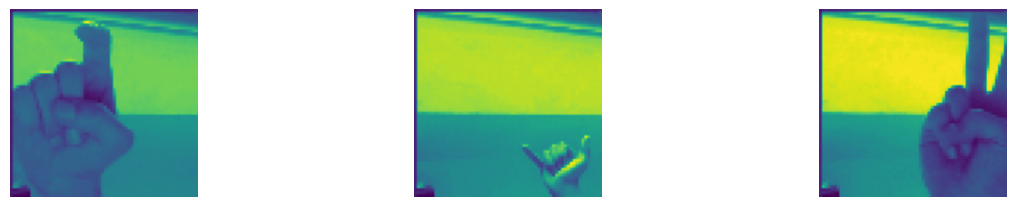

In [194]:
image_1, label_1 = load_single_image(channels = 0, normalize=False, add_dimension=False, u8 = True)
image_2, label_2 = load_single_image(single_path = p2, channels = 0, normalize=False, add_dimension=False, u8 = True)
image_3, label_3 = load_single_image(single_path = p6, channels = 0, normalize=False, add_dimension=False, u8 = True)

subplot_images((sobel2(image_1), sobel2(image_2), sobel2(image_3)))
subplot_images((image_1, image_2, image_3))

Laplacian

Type of this data is: <class 'numpy.ndarray'>
Shape of this array is: (64, 64)
Max value of 2D matrix is: 224
Min value of 2D matrix is: 14
Picture has dimensions: (64, 64), and it belongs to class: X


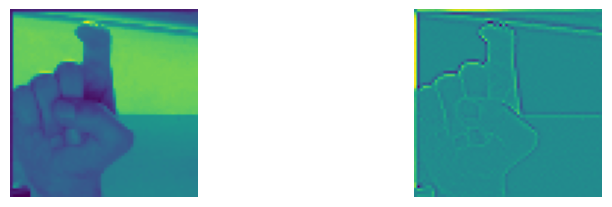

In [ ]:
t, label = load_single_image(channels = 0, add_dimension = False, normalize=False, u8 = True)
laplacian = cv2.Laplacian(t, cv2.CV_64F)
subplot_images((t, laplacian))

### Thresholding, OTSU

Simple thresholding

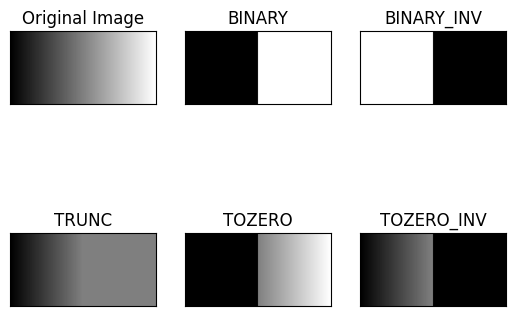

In [ ]:
img = cv2.imread('./drive/MyDrive/Neuralne mreze/Ultimativni_folder/Flex/gradient.png',0)
ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

Type of this data is: <class 'numpy.ndarray'>
Shape of this array is: (64, 64)
Max value of 2D matrix is: 224
Min value of 2D matrix is: 14
Picture has dimensions: (64, 64), and it belongs to class: X


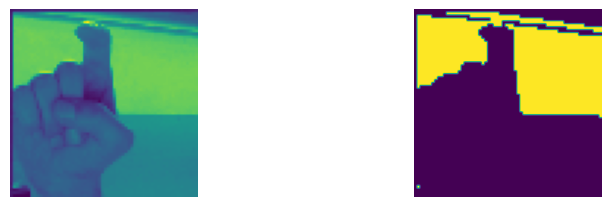

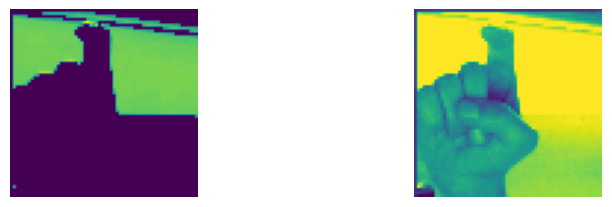

In [ ]:
image_1, label_1 = load_single_image(channels = 0, normalize=False, add_dimension=False, u8 = True)
ret, th = cv2.threshold(image_1, 127, 255, cv2.THRESH_BINARY)
ret, th1 = cv2.threshold(image_1, 127, 255, cv2.THRESH_TOZERO)
ret, th2 = cv2.threshold(image_1, 127, 255, cv2.THRESH_TRUNC)
subplot_images([image_1, th])
subplot_images([th1, th2])

Type of this data is: <class 'numpy.ndarray'>
Shape of this array is: (64, 64)
Max value of 2D matrix is: 224
Min value of 2D matrix is: 14
Picture has dimensions: (64, 64), and it belongs to class: X
Type of this data is: <class 'numpy.ndarray'>
Shape of this array is: (64, 64)
Max value of 2D matrix is: 255
Min value of 2D matrix is: 0


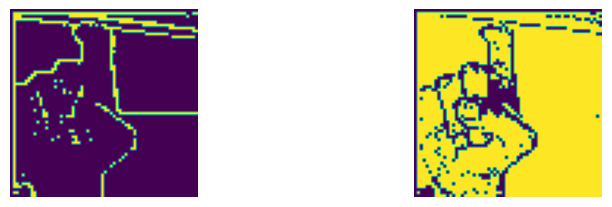

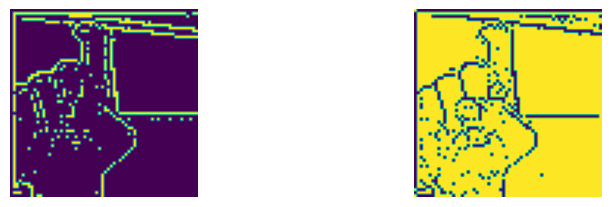

In [ ]:
image_1, label_1 = load_single_image(channels = 0, normalize=False, add_dimension=False, u8 = True)
edge = cv2.filter2D(image_1, -1, kernel10)
sharpen = cv2.filter2D(image_1, -1, kernel11)
f1 = cv2.filter2D(cv2.filter2D(image_1, -1, kernel11), -1, kernel10)
f2 = cv2.filter2D(cv2.filter2D(image_1, -1, kernel11), -1, kernel11)

edge2 = cv2.filter2D(cv2.filter2D(edge, -1, kernel1), -1, kernel10)
sharpen2 = cv2.filter2D(cv2.filter2D(sharpen, -1, kernel1), -1, kernel11)

ret, th1 = cv2.threshold(edge, 47, 255, cv2.THRESH_BINARY)
ret, th2 = cv2.threshold(sharpen, 65, 255, cv2.THRESH_BINARY)
ret, th3 = cv2.threshold(f1, 167, 255, cv2.THRESH_BINARY)
ret, th4 = cv2.threshold(f2, 0, 127, cv2.THRESH_BINARY)

subplot_images((th1, th2))
subplot_images((th3, th4))

analyze(th2)

Adaptive threshold

Type of this data is: <class 'numpy.ndarray'>
Shape of this array is: (64, 64)
Max value of 2D matrix is: 224
Min value of 2D matrix is: 14
Picture has dimensions: (64, 64), and it belongs to class: X


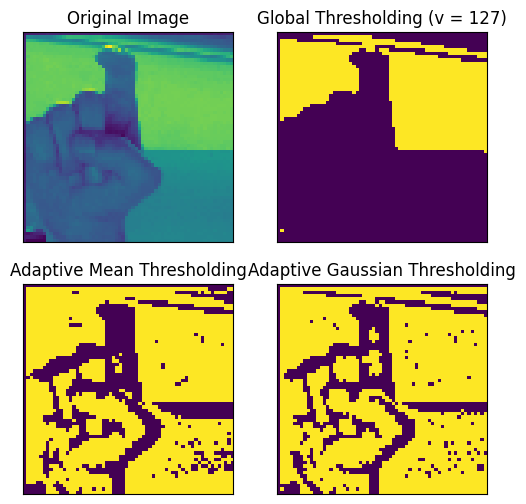

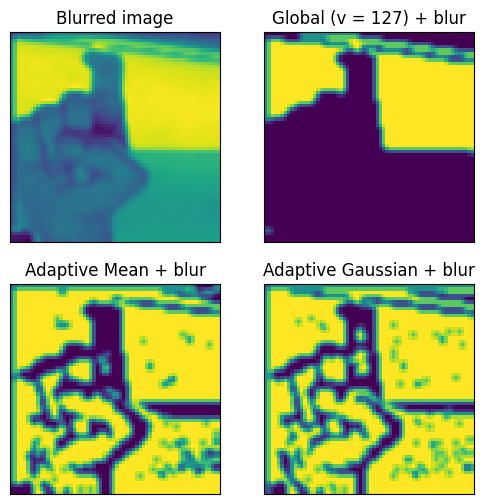

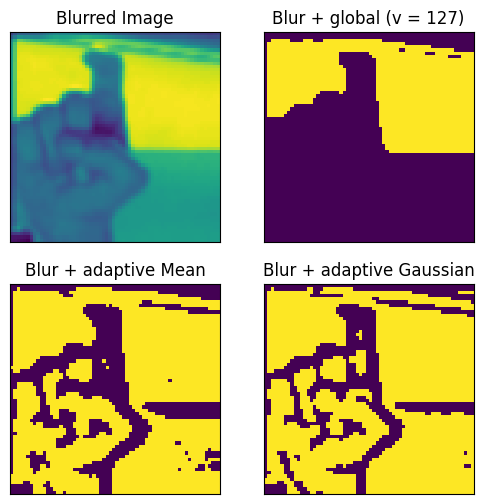

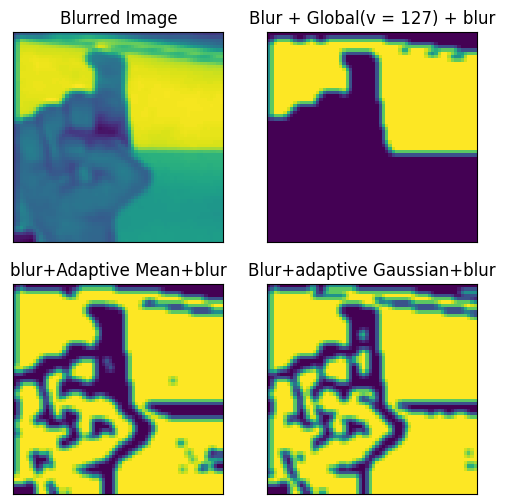

In [ ]:
img, l = load_single_image(channels = 0, add_dimension = False, normalize = False, u8 = True)
#img = cv2.imread('./drive/MyDrive/Neuralne mreze/Ultimativni_folder/Flex/gradient.png',0)
ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)
titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]
plt.figure(figsize=(6,6))
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i])
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

#threshold + blur
ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)
titles = ['Blurred image', 'Global (v = 127) + blur',
            'Adaptive Mean + blur', 'Adaptive Gaussian + blur']
images = [img, th1, th2, th3]
plt.figure(figsize=(6, 6))
for i in range(4):
    plt.subplot(2,2,i+1), plt.imshow(cv2.GaussianBlur(images[i], (3, 3), 0))
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()


#Blur + threshold
blurred = cv2.GaussianBlur(img, (3, 3), 0);
ret,th1 = cv2.threshold(blurred,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(blurred,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(blurred,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)
titles = ['Blurred Image', 'Blur + global (v = 127)',
            'Blur + adaptive Mean', 'Blur + adaptive Gaussian']
images = [blurred, th1, th2, th3]
plt.figure(figsize=(6,6))
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i])
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()



#Blur + threshold + blur
b2 = cv2.GaussianBlur(th1, (3, 3), 0);
b3 = cv2.GaussianBlur(th2, (3, 3), 0);
b4 = cv2.GaussianBlur(th3, (3, 3), 0);
titles = ['Blurred Image', 'Blur + Global(v = 127) + blur',
            'blur+Adaptive Mean+blur', 'Blur+adaptive Gaussian+blur']
images = [blurred, b2, b3, b4]
plt.figure(figsize=(6,6))
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i])
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

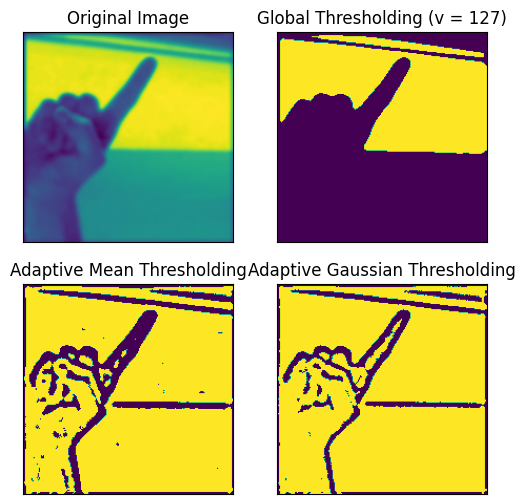

In [ ]:
img = cv2.imread(p3,0)
img = cv2.GaussianBlur(img, (9,9), 0)

ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)

th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)
titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]
plt.figure(figsize=(6,6))
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i])
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

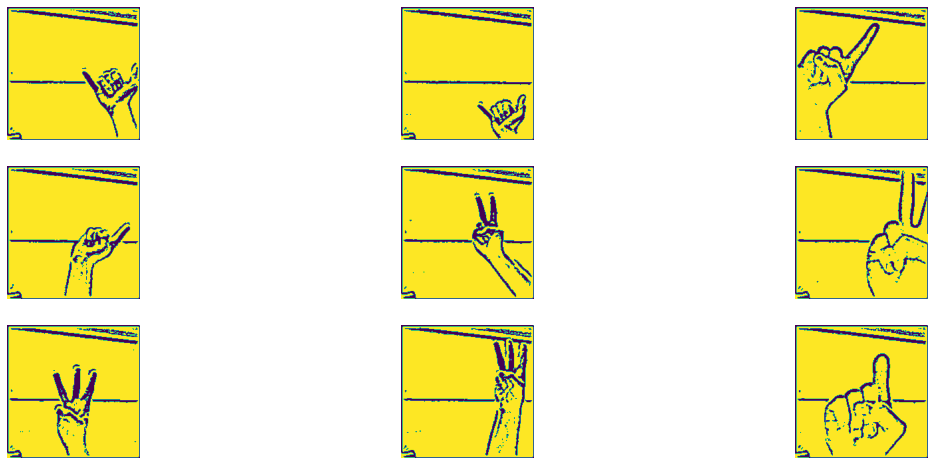

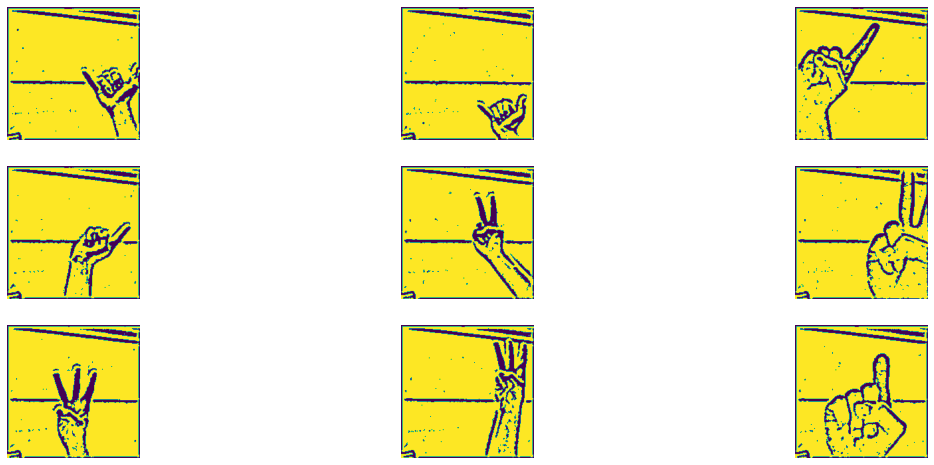

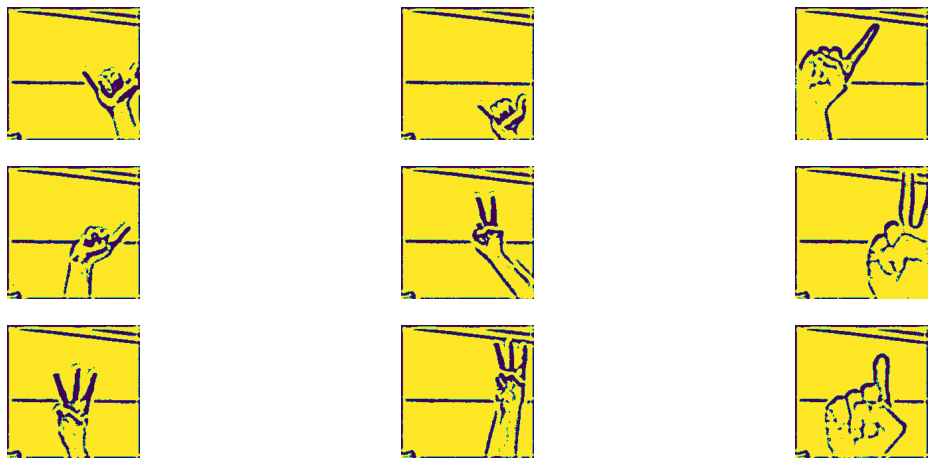

In [ ]:
paths = [p1,p2,p3, p4, p5, p6, p7, p8, p9]

#Blur + adaptive threshold
plt.figure(figsize=(20,20))
j = 1
for p in paths:
    img = cv2.imread(p,0)
    #blurred = cv2.GaussianBlur(img, (3,3), 1)
    blurred = cv2.medianBlur(img, 3)
    blurred = cv2.medianBlur(blurred, 3)
    #th = cv2.adaptiveThreshold(blurred,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
           # cv2.THRESH_BINARY_INV,11,2)
    th = cv2.adaptiveThreshold(blurred,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
            cv2.THRESH_BINARY,11,3)
    plt.subplot(7,3,j)
    plt.imshow(th)
    plt.axis('off')
    j=j+1

#Blur + adaptive threshold
plt.figure(figsize=(20,20))
j = 1
for p in paths:
    img = cv2.imread(p,0)
    blurred = cv2.GaussianBlur(img, (3,3), 1)
    blurred = cv2.GaussianBlur(blurred, (3,3), 1)
    #blurred = cv2.medianBlur(img, 3)
    #blurred = cv2.medianBlur(blurred, 3)
    #th = cv2.adaptiveThreshold(blurred,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
           # cv2.THRESH_BINARY_INV,11,2)
    th = cv2.adaptiveThreshold(blurred,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
            cv2.THRESH_BINARY,11,2)
    plt.subplot(7,3,j)
    plt.imshow(th)
    plt.axis('off')
    j=j+1


#Blur + adaptive threshold
plt.figure(figsize=(20,20))
j = 1
for p in paths:
    img = cv2.imread(p,0)
    blurred = cv2.GaussianBlur(img, (5,5), 2)
    blurred = cv2.GaussianBlur(blurred, (5,5), 2)
    #blurred = cv2.medianBlur(img, 3)
    #blurred = cv2.medianBlur(blurred, 3)
    #th = cv2.adaptiveThreshold(blurred,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
           # cv2.THRESH_BINARY_INV,11,2)
    th = cv2.adaptiveThreshold(blurred,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
            cv2.THRESH_BINARY,11,2)
    plt.subplot(7,3,j)
    plt.imshow(th)
    plt.axis('off')
    j=j+1

In [11]:
def adaptive_thresholding_1(img):
    img = cv2.GaussianBlur(img, (9,9), 0)
    th = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)
    return th

In [24]:
def adaptive_thresholding_2(img):
    blurred = cv2.medianBlur(img, 3)
    blurred = cv2.medianBlur(blurred, 3)
    th = cv2.adaptiveThreshold(blurred,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
            cv2.THRESH_BINARY,11,3)
    return th

In [38]:
def adaptive_thresholding_5(img):
    blurred = cv2.medianBlur(img, 3)
    blurred = cv2.medianBlur(blurred, 3)
    th = cv2.adaptiveThreshold(blurred,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
            cv2.THRESH_BINARY,11,3)
    return th

In [25]:
def adaptive_thresholding_3(img):
    blurred = cv2.GaussianBlur(img, (5,5), 2)
    blurred = cv2.GaussianBlur(blurred, (5,5), 2)
    th = cv2.adaptiveThreshold(blurred,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
            cv2.THRESH_BINARY,11,2)
    return th

In [26]:
def adaptive_thresholding_4(img):
    blurred = cv2.GaussianBlur(img, (3,3), 1)
    blurred = cv2.GaussianBlur(blurred, (3,3), 1)
    th = cv2.adaptiveThreshold(blurred,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
            cv2.THRESH_BINARY,11,2)
    return th

# Modeling functions

In [12]:
def create_model(channels = 3):#it can be 1 or 3
    #hyperparams
    adam = Adam(learning_rate=0.0001)

    #architecture
    model = Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, channels)),
    layers.MaxPool2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPool2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPool2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(5, activation='softmax')])

    #compiling
    model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [13]:
def evaluate_model(model, X_test, Y_test):
    map_characters = { 0: 'V', 1: 'W', 2: 'X', 3: 'Y', 4: 'Z'} #mapping y_pred_argmax to alphabet
    y_pred_raw = model.predict(X_test) #prediction
    y_pred_argmax = y_pred_raw.argmax(axis=1) #argmaxing one hot encoded output
    y_test_argmax = Y_test.argmax(axis = 1)

    #accuracy, precition, recall, f1
    accuracy = accuracy_score(y_test_argmax, y_pred_argmax)
    print(f"Accuracy: {accuracy * 100:.2f}%")
    precision = precision_score(y_test_argmax, y_pred_argmax, average='macro') # macro for multiclass
    print(f"Precision: {precision:.2f}")
    recall = recall_score(y_test_argmax, y_pred_argmax, average='macro')
    print(f"Recall: {recall:.2f}")
    f1 = f1_score(y_test_argmax, y_pred_argmax, average='macro')
    print(f"F1 Score: {f1:.2f}")

    # confusion matrix
    cm = confusion_matrix(y_test_argmax, y_pred_argmax)

    # Plotting the confusion matrix
    sns.heatmap(cm, annot=True, fmt='g', cmap='viridis',
                xticklabels=map_characters.values(),
                yticklabels=map_characters.values())
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.show()

In [14]:
def plot_acc_loss(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    plt.figure()
    plt.subplot(121)
    plt.plot(acc)
    plt.plot(val_acc)
    plt.title('Accuracy')
    plt.legend(['train', 'val'])
    plt.subplot(122)
    plt.plot(loss)
    plt.plot(val_loss)
    plt.title('Loss')
    plt.legend(['train', 'val'])
    plt.show()

In [15]:
# hyperparams
epochs = 10
early_stopping = EarlyStopping(monitor='val_loss',patience=3,restore_best_weights=True)

# Score without preprocessing

Dataset pictures have 3 channels, there is no filters now

In [183]:
%%capture
X_test, D_test = load_train_test_images(test_folder, channels = 3, filter = None)
print(f"Test set has {len(X_test)} images.\n")
images, labels = load_train_test_images(train_folder, channels = 3, filter = None)
X_train, X_val, D_train, D_val = train_test_split(images, labels, test_size = 0.2)
print(f"Training set has {len(X_train)} images and Val set has {len(X_val)} images.")

In [184]:
%%capture
model = create_model(3)
history = model.fit(X_train, D_train,
                    epochs=10,
                    verbose=1,
                    validation_data=(X_val, D_val), callbacks=[early_stopping], shuffle = True)

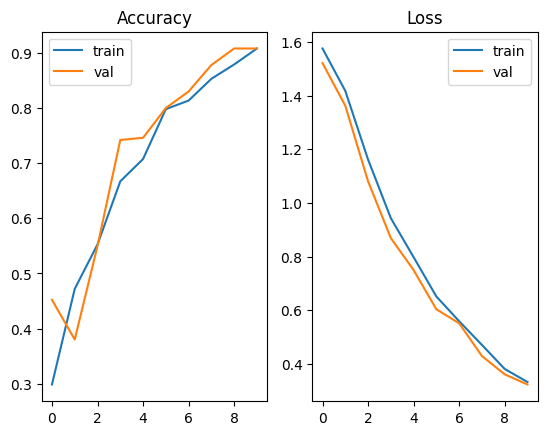

In [185]:
plot_acc_loss(history)

16/16 [==============================] - 1s 82ms/step
Accuracy: 70.60%
Precision: 0.69
Recall: 0.71
F1 Score: 0.68


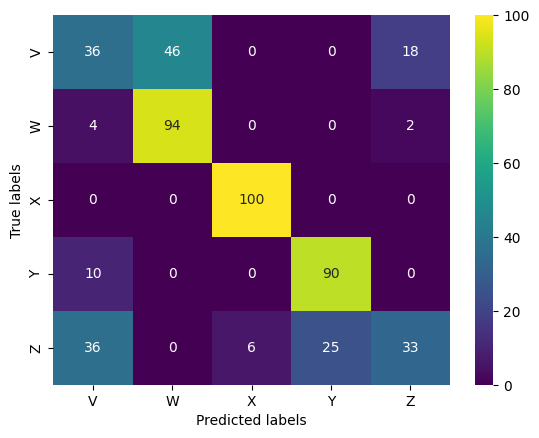

In [186]:
evaluate_model(model, X_test, D_test)

All scores are around 0.7

# Preprocesed datasets

Now we work with dataset pictures with single channel, that are preprocessed with filters

In [21]:
model = create_model(1)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 6, 6, 64)          0

## Manual egde detection filter

In [ ]:
X_test, D_test = load_train_test_images(test_folder, channels = 1, filter = manual_edge4)
print(f"Test set has {len(X_test)} images.\n")
images, labels = load_train_test_images(train_folder, channels = 1, filter = manual_edge4)
X_train, X_val, D_train, D_val = train_test_split(images, labels, test_size = 0.2)
print(f"Training set has {len(X_train)} images and Val set has {len(X_val)} images.")

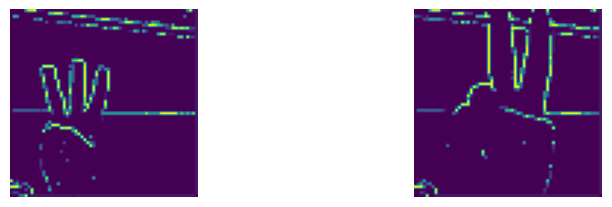

In [108]:
subplot_images((X_train[100:102]))

In [ ]:
model = create_model(1)
history = model.fit(X_train, D_train,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_val, D_val), callbacks=[early_stopping], shuffle = True)

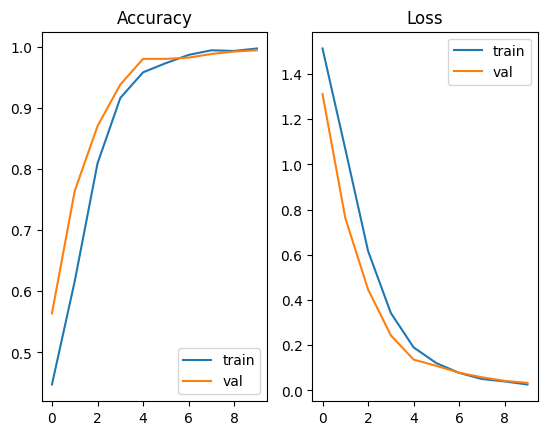

In [110]:
plot_acc_loss(history)

16/16 [==============================] - 1s 47ms/step
Accuracy: 68.00%
Precision: 0.70
Recall: 0.68
F1 Score: 0.65


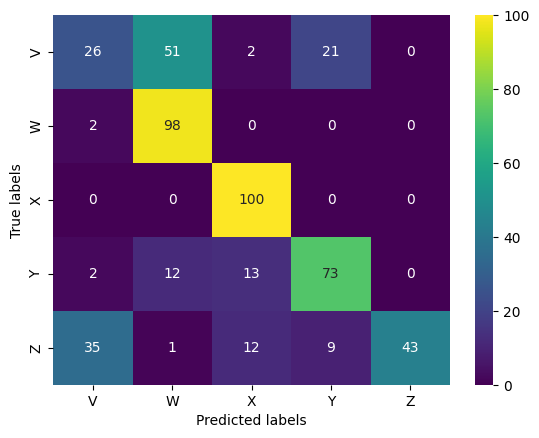

In [111]:
evaluate_model(model, X_test, D_test)

## Canny filter - edge detection

In [ ]:
X_test, D_test = load_train_test_images(test_folder, channels = 1, filter = canny2)
print(f"Test set has {len(X_test)} images.\n")
images, labels = load_train_test_images(train_folder, channels = 1, filter = canny2)
X_train, X_val, D_train, D_val = train_test_split(images, labels, test_size = 0.2)
print(f"Training set has {len(X_train)} images and Val set has {len(X_val)} images.")

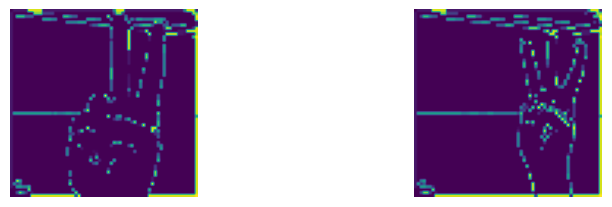

In [155]:
subplot_images((X_train[1700:1702]))

In [ ]:
model = create_model(1)
history = model.fit(X_train, D_train,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_val, D_val), callbacks=[early_stopping], shuffle = True)

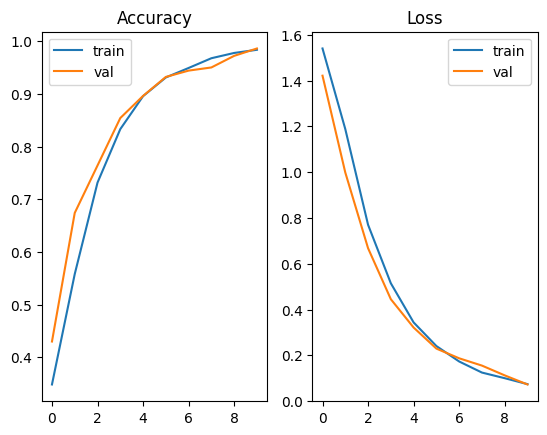

In [157]:
plot_acc_loss(history)

16/16 [==============================] - 1s 75ms/step
Accuracy: 71.80%
Precision: 0.76
Recall: 0.72
F1 Score: 0.70


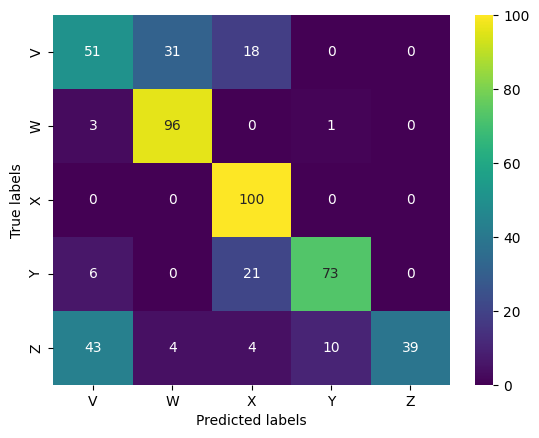

In [158]:
evaluate_model(model, X_test, D_test)

## Sobbel filter - edge detection

In [ ]:
X_test, D_test = load_train_test_images(test_folder, normalize = False, channels = 1, filter = sobel2)
print(f"Test set has {len(X_test)} images.\n")
images, labels = load_train_test_images(train_folder, normalize = False, channels = 1, filter = sobel2)
X_train, X_val, D_train, D_val = train_test_split(images, labels, test_size = 0.2)
print(f"Training set has {len(X_train)} images and Val set has {len(X_val)} images.")

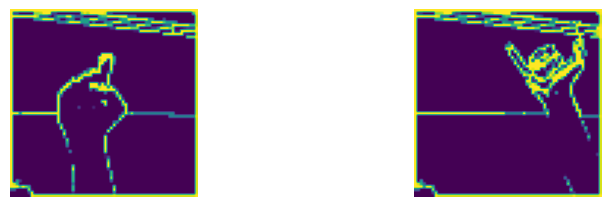

In [206]:
subplot_images((X_train[1700:1702]))

In [ ]:
model = create_model(1)
history = model.fit(X_train, D_train,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_val, D_val), callbacks=[early_stopping], shuffle = True)

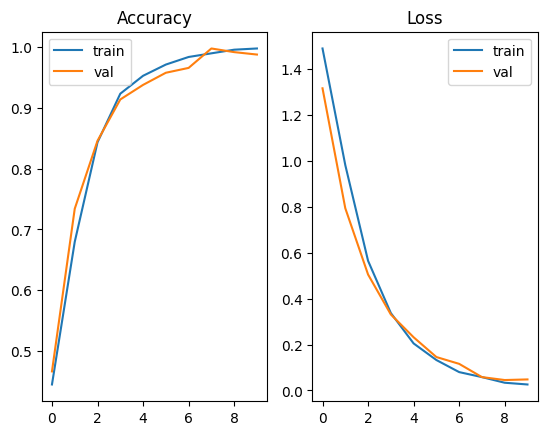

In [209]:
plot_acc_loss(history)

16/16 [==============================] - 2s 131ms/step
Accuracy: 66.00%
Precision: 0.72
Recall: 0.66
F1 Score: 0.62


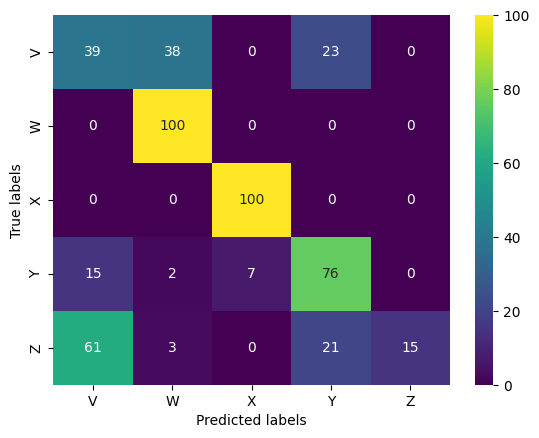

In [211]:
evaluate_model(model, X_test, D_test)

## Adaptive thresholding  - edge detection

In [ ]:
X_test, D_test = load_train_test_images(test_folder, channels = 1, filter = adaptive_thresholding_1)
print(f"Test set has {len(X_test)} images.\n")
images, labels = load_train_test_images(train_folder, channels = 1, filter = adaptive_thresholding_1)
X_train, X_val, D_train, D_val = train_test_split(images, labels, test_size = 0.2)
print(f"Training set has {len(X_train)} images and Val set has {len(X_val)} images.")

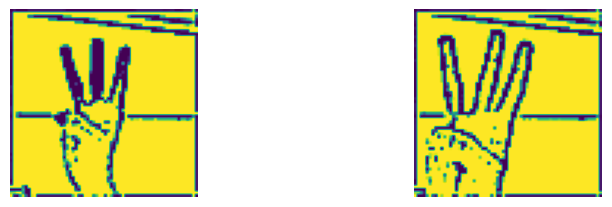

In [18]:
subplot_images((X_train[100:102]))

In [ ]:
model = create_model(1)
history = model.fit(X_train, D_train,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_val, D_val), callbacks=[early_stopping], shuffle = True)

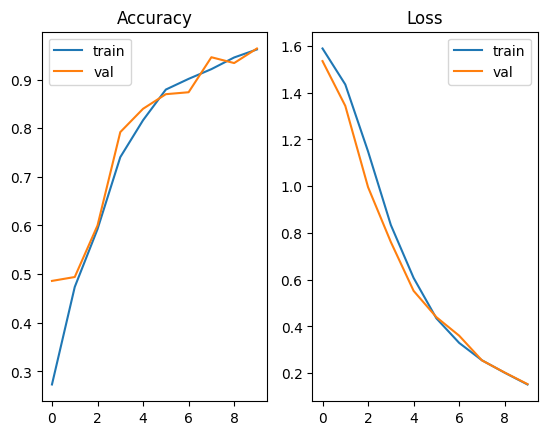

In [20]:
plot_acc_loss(history)

16/16 [==============================] - 2s 116ms/step
Accuracy: 69.00%
Precision: 0.74
Recall: 0.69
F1 Score: 0.65


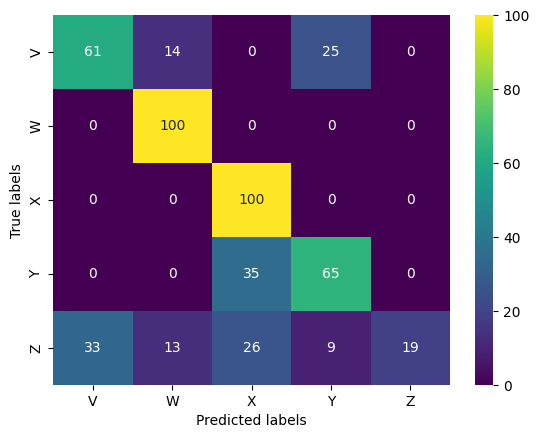

In [22]:
evaluate_model(model, X_test, D_test)

## Median blur + adaptive thresholding - edge detection

In [ ]:
X_test, D_test = load_train_test_images(test_folder, channels = 1, filter = adaptive_thresholding_2)
print(f"Test set has {len(X_test)} images.\n")
images, labels = load_train_test_images(train_folder, channels = 1, filter = adaptive_thresholding_2)
X_train, X_val, D_train, D_val = train_test_split(images, labels, test_size = 0.2)
print(f"Training set has {len(X_train)} images and Val set has {len(X_val)} images.")

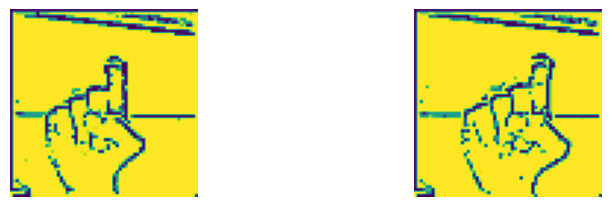

In [29]:
subplot_images((X_train[100:102]))

In [ ]:
model = create_model(1)
history = model.fit(X_train, D_train,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_val, D_val), callbacks=[early_stopping], shuffle = True)

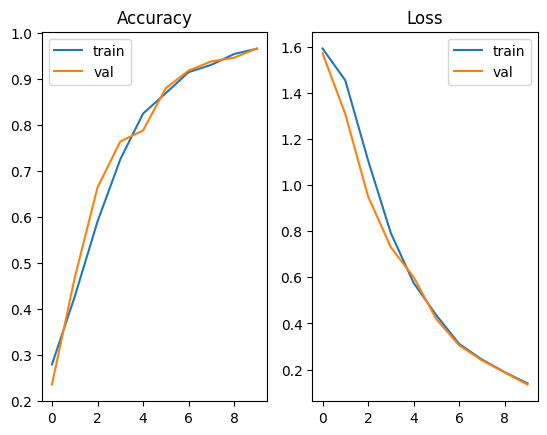

In [32]:
plot_acc_loss(history)

16/16 [==============================] - 1s 40ms/step
Accuracy: 73.40%
Precision: 0.77
Recall: 0.73
F1 Score: 0.73


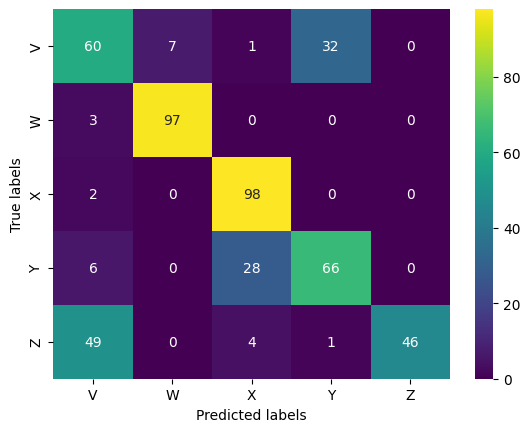

In [33]:
evaluate_model(model, X_test, D_test)

## Gaussian blur + adaptive thresholding - edge detection

In [ ]:
X_test, D_test = load_train_test_images(test_folder, channels = 1, filter = adaptive_thresholding_4)
print(f"Test set has {len(X_test)} images.\n")
images, labels = load_train_test_images(train_folder, channels = 1, filter = adaptive_thresholding_4)
X_train, X_val, D_train, D_val = train_test_split(images, labels, test_size = 0.2)
print(f"Training set has {len(X_train)} images and Val set has {len(X_val)} images.")

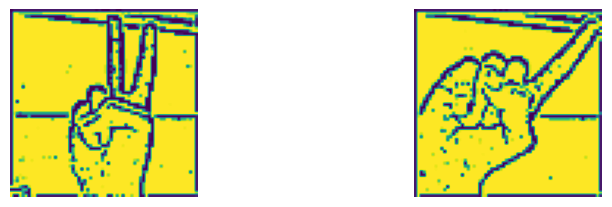

In [50]:
subplot_images((X_train[1000:1002]))

In [ ]:
model = create_model(1)
history = model.fit(X_train, D_train,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_val, D_val), shuffle=True)

16/16 [==============================] - 1s 42ms/step
Accuracy: 67.00%
Precision: 0.73
Recall: 0.67
F1 Score: 0.64


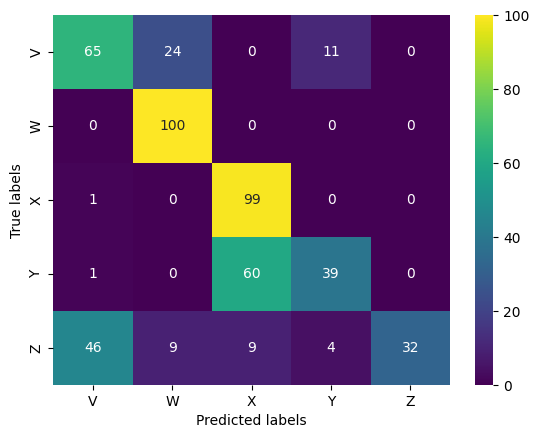

In [53]:
evaluate_model(model, X_test, D_test)

In [ ]:
X_test, D_test = load_train_test_images(test_folder, channels = 1, filter = adaptive_thresholding_3)
print(f"Test set has {len(X_test)} images.\n")
images, labels = load_train_test_images(train_folder, channels = 1, filter = adaptive_thresholding_3)
X_train, X_val, D_train, D_val = train_test_split(images, labels, test_size = 0.2)
print(f"Training set has {len(X_train)} images and Val set has {len(X_val)} images.")

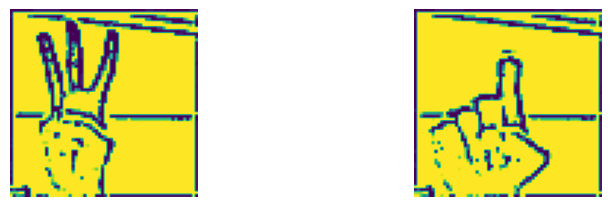

In [57]:
subplot_images((X_train[100:102]))

In [ ]:
model = create_model(1)
history = model.fit(X_train, D_train,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_val, D_val), shuffle = True)

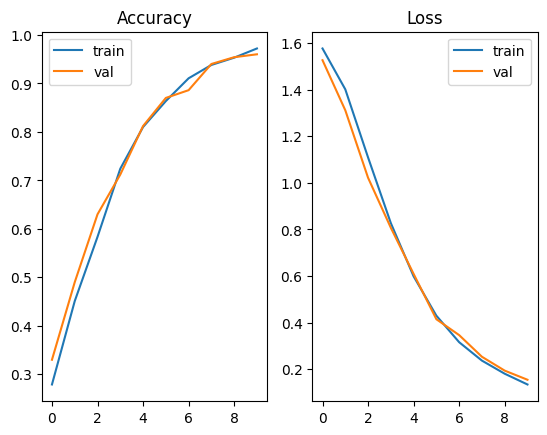

In [60]:
plot_acc_loss(history)

16/16 [==============================] - 1s 44ms/step
Accuracy: 72.40%
Precision: 0.75
Recall: 0.72
F1 Score: 0.71


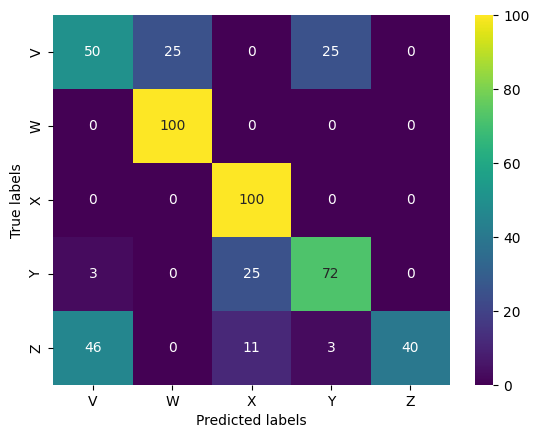

In [61]:
evaluate_model(model, X_test, D_test)

# Combination of filters

Now I will select a couple of best filters, create diferently filtered datasets, then fit the same model with each of them

In [117]:
model_0 = create_model(1) # root model is created

In [ ]:
X_test, D_test = load_train_test_images(test_folder, channels = 1, filter = adaptive_thresholding_2)
print(f"Test set has {len(X_test)} images.\n")
images, labels = load_train_test_images(train_folder, channels = 1, filter = adaptive_thresholding_2)
X_train, X_val, D_train, D_val = train_test_split(images, labels, test_size = 0.2)
print(f"Training set has {len(X_train)} images and Val set has {len(X_val)} images.")

In [ ]:
history_0 = model_0.fit(X_train, D_train,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_val, D_val), callbacks=[early_stopping], shuffle = True)

16/16 [==============================] - 1s 42ms/step
Accuracy: 74.40%
Precision: 0.77
Recall: 0.74
F1 Score: 0.73


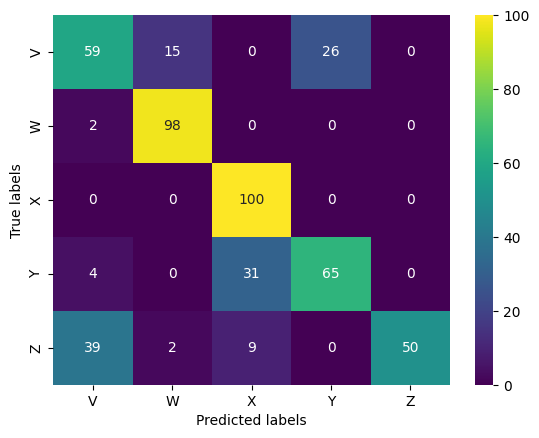

In [120]:
evaluate_model(model_0, X_test, D_test)

In [ ]:
X_test, D_test = load_train_test_images(test_folder, channels = 1, filter = adaptive_thresholding_3)
print(f"Test set has {len(X_test)} images.\n")
images, labels = load_train_test_images(train_folder, channels = 1, filter = adaptive_thresholding_3)
X_train, X_val, D_train, D_val = train_test_split(images, labels, test_size = 0.2)
print(f"Training set has {len(X_train)} images and Val set has {len(X_val)} images.")

In [ ]:
history_1 = model_0.fit(X_train, D_train,
                    epochs=5,
                    verbose=1,
                    validation_data=(X_val, D_val), callbacks=[early_stopping], shuffle = True)

16/16 [==============================] - 1s 42ms/step
Accuracy: 76.40%
Precision: 0.77
Recall: 0.76
F1 Score: 0.75


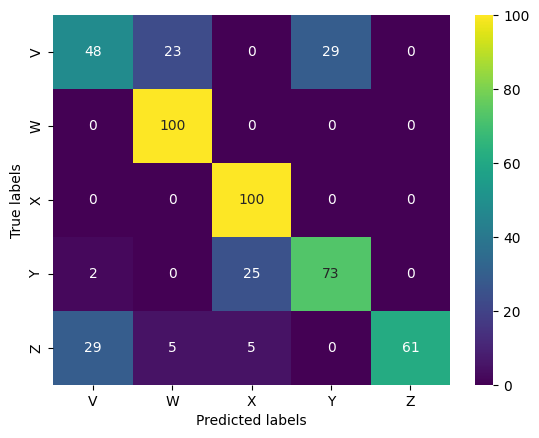

In [123]:
evaluate_model(model_0, X_test, D_test)

In [ ]:
X_test, D_test = load_train_test_images(test_folder, channels = 1, normalize = True, filter = adaptive_thresholding_4)
print(f"Test set has {len(X_test)} images.\n")
images, labels = load_train_test_images(train_folder, channels = 1, normalize = True, filter = adaptive_thresholding_4)
X_train, X_val, D_train, D_val = train_test_split(images, labels, test_size = 0.2)
print(f"Training set has {len(X_train)} images and Val set has {len(X_val)} images.")

In [ ]:
history_2 = model_0.fit(X_train, D_train,
                    epochs=5,
                    verbose=1,
                    validation_data=(X_val, D_val), callbacks=[early_stopping], shuffle = True)

16/16 [==============================] - 1s 41ms/step
Accuracy: 78.20%
Precision: 0.79
Recall: 0.78
F1 Score: 0.77


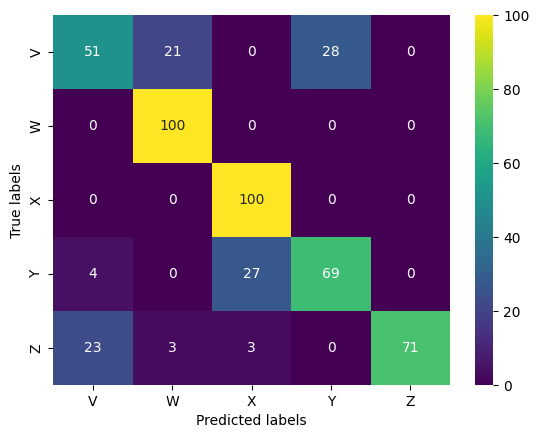

In [126]:
evaluate_model(model_0, X_test, D_test)

In [128]:
import copy
model_1 = copy.deepcopy(model_0)

In [ ]:
X_test, D_test = load_train_test_images(test_folder, channels = 1, normalize = True, filter = adaptive_thresholding_5)
print(f"Test set has {len(X_test)} images.\n")
images, labels = load_train_test_images(train_folder, channels = 1, normalize = True, filter = adaptive_thresholding_5)
X_train, X_val, D_train, D_val = train_test_split(images, labels, test_size = 0.2)
print(f"Training set has {len(X_train)} images and Val set has {len(X_val)} images.")

In [ ]:
history_4 = model_1.fit(X_train, D_train,
                    epochs=5,
                    verbose=1,
                    validation_data=(X_val, D_val), callbacks=[early_stopping], shuffle = True)

16/16 [==============================] - 1s 41ms/step
Accuracy: 79.80%
Precision: 0.80
Recall: 0.80
F1 Score: 0.79


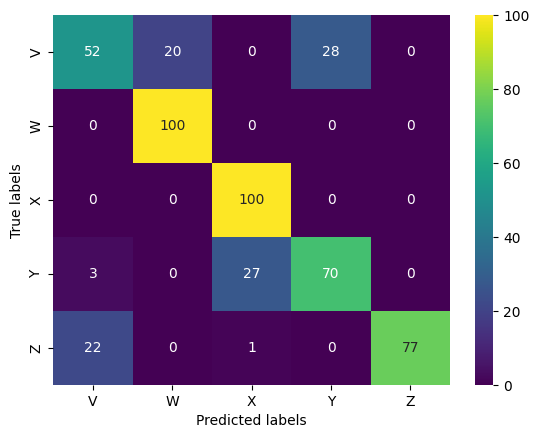

In [132]:
evaluate_model(model_1, X_test, D_test)

In [171]:
model_2 = copy.deepcopy(model_1)

In [172]:
%%capture
X_test, D_test = load_train_test_images(test_folder, channels = 1, normalize = True, filter = adaptive_thresholding_5)
print(f"Test set has {len(X_test)} images.\n")
images, labels = load_train_test_images(train_folder, channels = 1, normalize = True, filter = adaptive_thresholding_5)
X_train, X_val, D_train, D_val = train_test_split(images, labels, test_size = 0.2)
print(f"Training set has {len(X_train)} images and Val set has {len(X_val)} images.")

In [ ]:
history_5 = model_2.fit(X_train, D_train,
                    epochs=5,
                    verbose=1,
                    validation_data=(X_val, D_val), callbacks=[early_stopping], shuffle = True)

16/16 [==============================] - 1s 74ms/step
Accuracy: 80.20%
Precision: 0.81
Recall: 0.80
F1 Score: 0.80


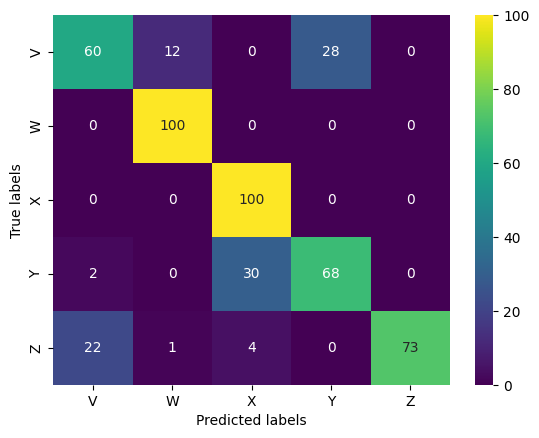

In [174]:
evaluate_model(model_2, X_test, D_test)